# Jupyterlab running Anaconda Environment

## Activating environment

```
source activate zeppelin
```

## Installing packages in the current Python environment

```
conda install matplotlib numpy scipy sympy
```

## Fenómeno de Runge

Consideremos el polinomio interpolador de Lagrange de la función
$$f(x) = \frac{1}{(1 + 12x^2)}$$
en el intervalo $\lbrack −1, 1 \rbrack$ para nodos equiespaciados.

**¿Tiende a cero el error $E_N(x) = f(x) − P_N(x)$ cuando $N$ crece?**

No: el máximo del término del error $E_N(x)$ crece cuando $N \to \infty$. Esta
falta de convergencia se conoce como **fenómeno de Runge**.

<Figure size 432x288 with 0 Axes>

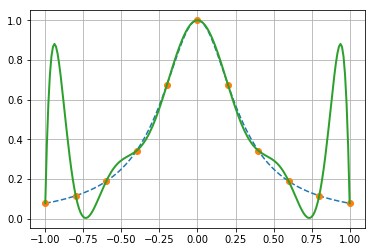

<Figure size 432x288 with 0 Axes>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

def f(x):
    return 1.0/(1.0 + 12.0 * x**2)

x = np.linspace(-1.0, 1.0, 200)
plt.plot(x, f(x), '--')
x2 = np.linspace(-1.0, 1.0, 11)
p = lagrange(x2, f(x2))
y2 = p(x2)
plt.plot(x2, y2, 'o')
plt.plot(x, p(x), linewidth=2.0)
plt.grid()
plt.figure()

## Una mejor solución usando polinomios de Chebyshev

<Figure size 432x288 with 0 Axes>

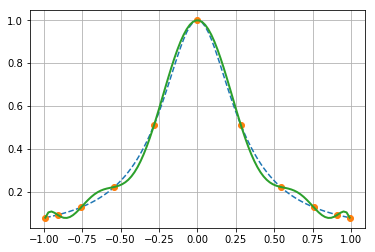

<Figure size 432x288 with 0 Axes>

In [4]:
from numpy.polynomial import Chebyshev as T
def f(x):
    return 1.0/(1.0 + 12.0 * x**2)

N = 11
x = np.cos([(2*k + 1)*np.pi/2.0/N for k in range(N)])
y = f(x)

p = T.fit(x, y, 10)
xx, yy = p.linspace()
plt.plot(xx, f(xx), '--')
plt.plot(x, y, 'o')
plt.plot(xx, yy, lw=2)
plt.grid()

plt.figure()

## Cómputo simbólico con Sympy

In [6]:
from sympy import FiniteSet
A = FiniteSet(1, 2, 3, 4)
3 in A

True

In [7]:
from sympy.categories import Object, NamedMorphism, Diagram
from sympy import FiniteSet, pprint, default_sort_key
A = Object("A")
B = Object("B")
C = Object("C")
f = NamedMorphism(A, B, "f")
g = NamedMorphism(B, C, "g")
d = Diagram([f, g])
premises_keys = sorted(d.premises.keys(), key=default_sort_key)
pprint(premises_keys, use_unicode=False)

[g*f:A-->C, id:A-->A, id:B-->B, id:C-->C, f:A-->B, g:B-->C]


In [8]:
pprint(d.premises, use_unicode=False)

{g*f:A-->C: EmptySet(), id:A-->A: EmptySet(), id:B-->B: EmptySet(), id:C-->C: 
EmptySet(), f:A-->B: EmptySet(), g:B-->C: EmptySet()}


In [9]:
d = Diagram([f, g], {g * f: "unique"})

# Logic Module

http://docs.sympy.org/latest/modules/logic.html